Time series analyses
====================
Ref: https://www.quantstart.com/articles/Serial-Correlation-in-Time-Series-Analysis

Covariance
----------

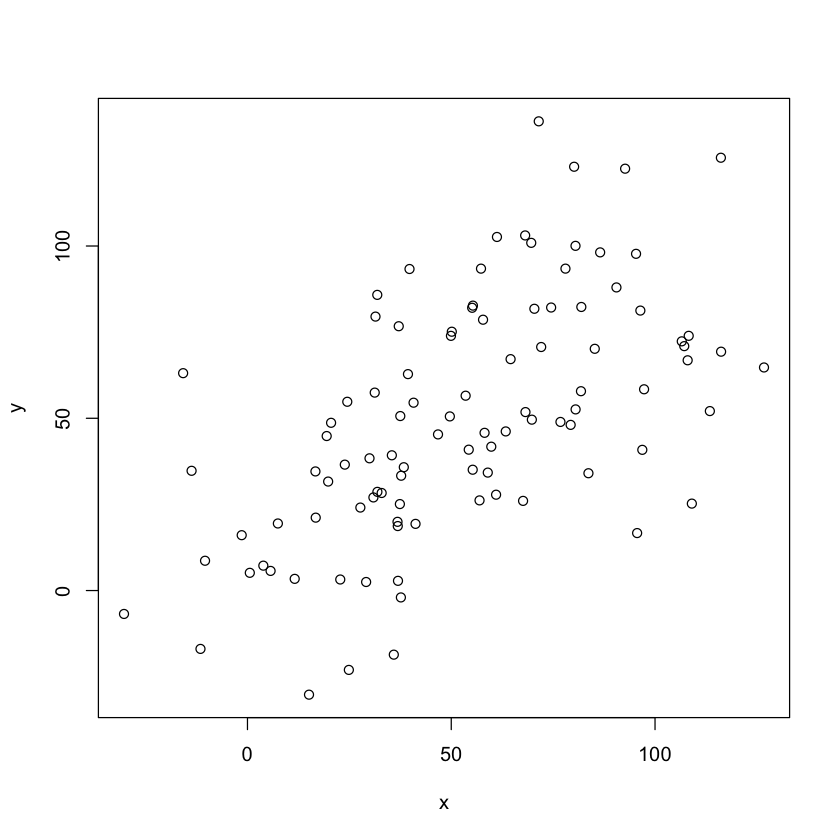

In [1]:
set.seed(1)
x <- seq(1,100) + 20.0*rnorm(1:100)
set.seed(2)
y <- seq(1,100) + 20.0*rnorm(1:100)
plot(x,y)

In [2]:
cov(x,y)

[1] 681.6859

Correlation
-----------

In [3]:
cor(x,y)

[1] 0.5796604

Correlogram
-----------

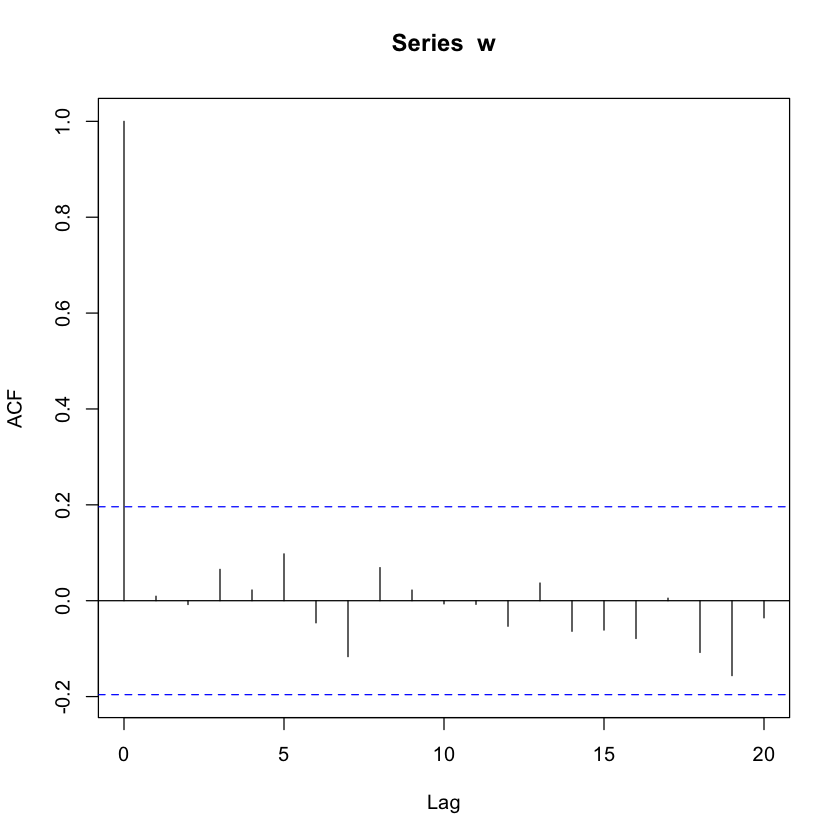

In [4]:
set.seed(3)
w<-rnorm(100)
acf(w)  #auto or cross-correlation function

Example 1- Fixed Linear Trend
--------------------------

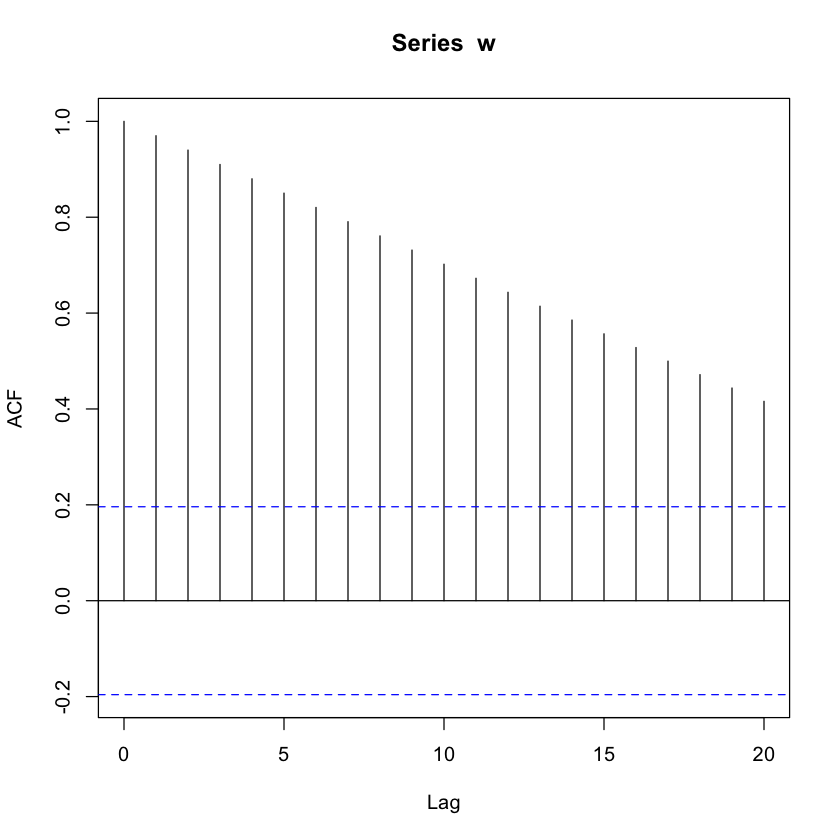

In [5]:
w<-seq(1,100)
acf(w)

The ACF plot decreases in an almost linear fashion as the lags increase. Hence a correlogram of this type is clear indication of a trend.

Example 2- Repeated Sequence
---------------------------

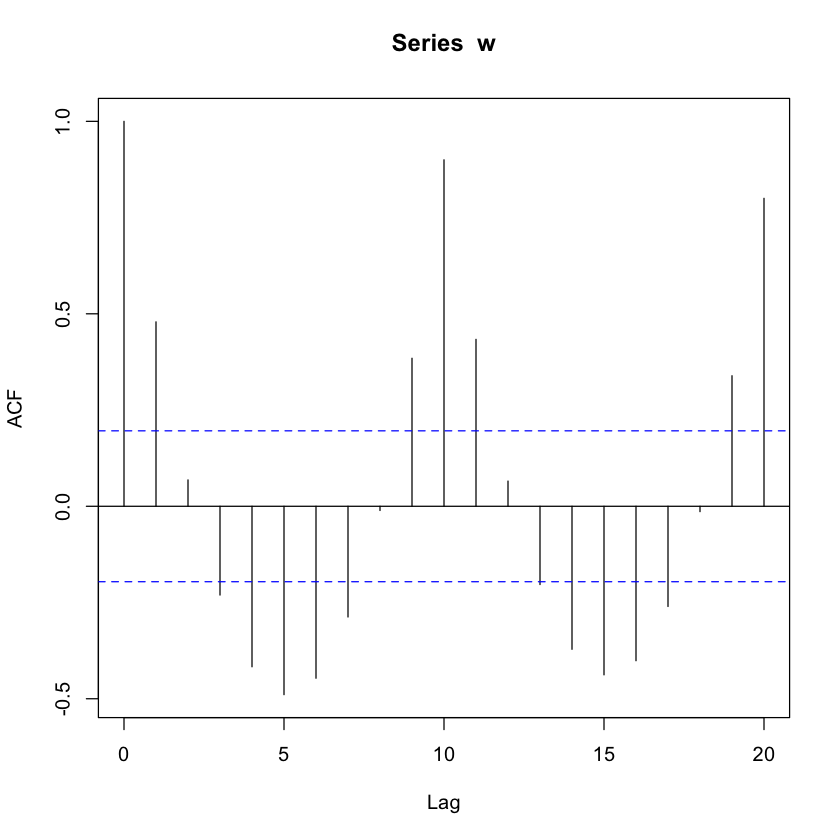

In [6]:
w<-rep(1:10,10)
acf(w)

At lags 10 and 20 there are significant peaks because the sequences are repeating with a period of 10. There is a negative correlation at lags 5 and 15 of exactly -0.5. This correlogram indicates that seasonality/periodic behavior. We do, however, see a slight decline in the acf with increasing lag due to small prediction errors. 

**Spectral decomposition **

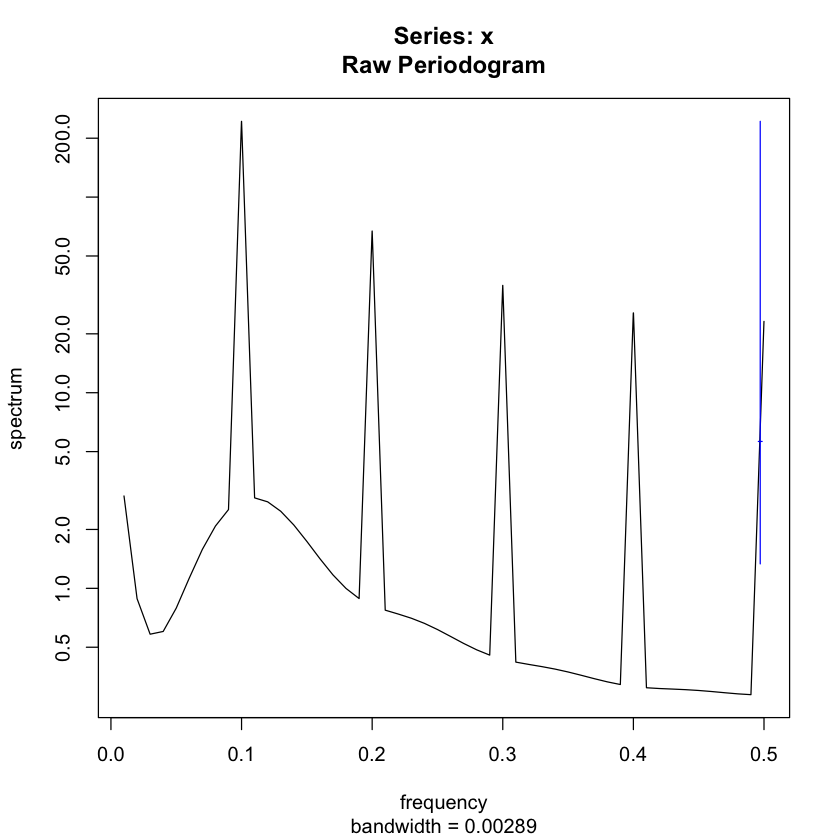

In [7]:
spectrum(w)

Random walk
-----------

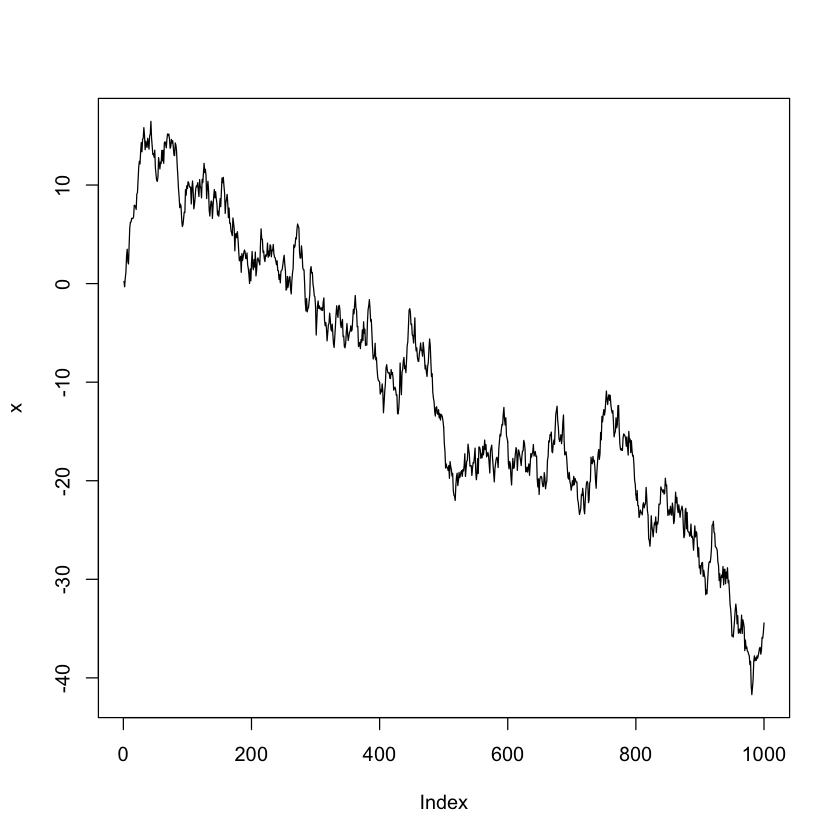

In [8]:
set.seed(4)
x <- w <- rnorm(1000)
for (t in 2:1000) x[t] <- x[t-1] + w[t]
plot(x,type="l")

**Correlogram**

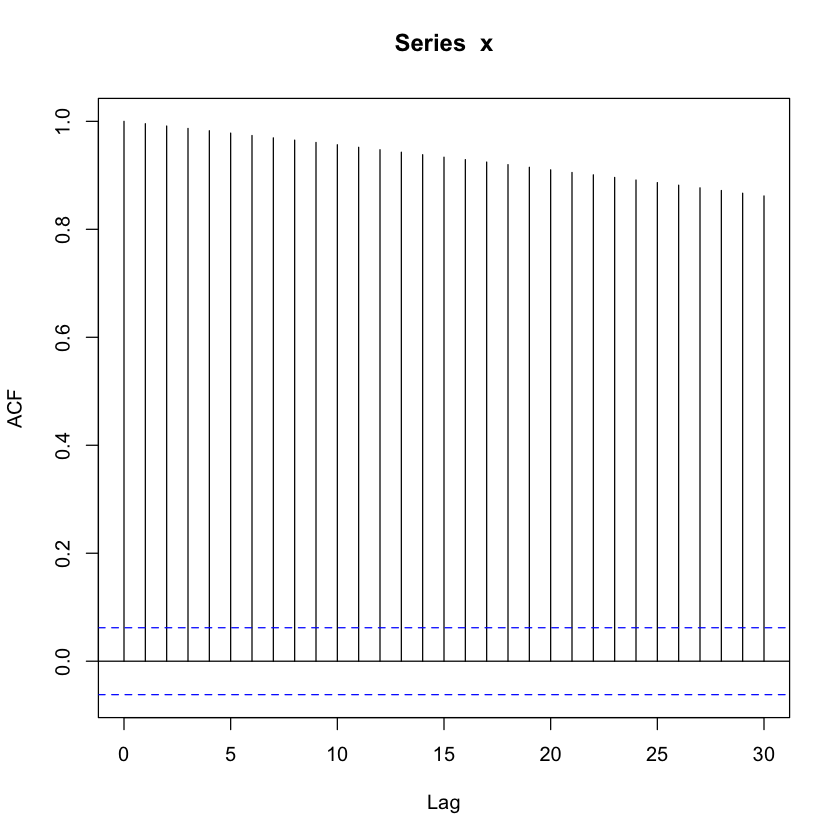

In [9]:
acf(x)

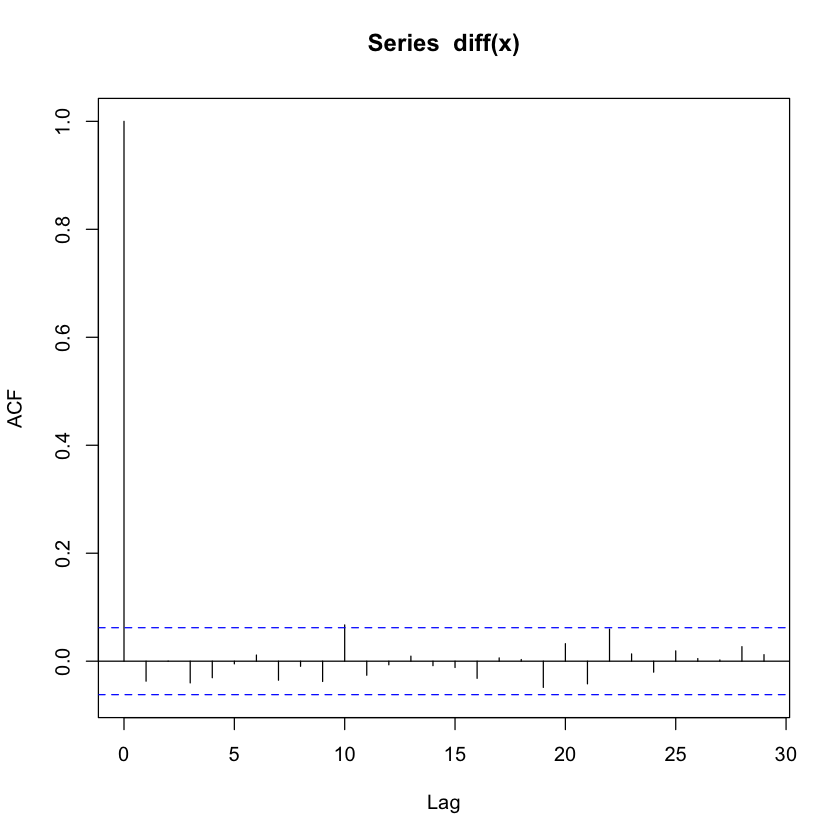

In [10]:
acf(diff(x))

The correlogram looks like that of discrete white noise. 

Fitting to Financial Data
-------------------------
We can use the R package quantmod to easily extract financial data from Yahoo Finance. We are going to see if a random walk model is a good fit for some equities data. In particular, I am going to choose Microsoft (MSFT).

In [11]:
library("TTR")
require('quantmod')
getSymbols('MSFT',src='yahoo')

Loading required package: quantmod
Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Version 0.4-0 included new data defaults. See ?getSymbols.
    As of 0.4-0, ‘getSymbols’ uses env=parent.frame() and
 auto.assign=TRUE by default.

 This  behavior  will be  phased out in 0.5-0  when the call  will
 default to use auto.assign=FALSE. getOption("getSymbols.env") and 
 getOptions("getSymbols.auto.assign") are now checked for alternate defaults

 This message is shown once per session and may be disabled by setting 
 options("getSymbols.warning4.0"=FALSE). See ?getSymbols for more details.


[1] "MSFT"

In [12]:
MSFT[1:10]

           MSFT.Open MSFT.High MSFT.Low MSFT.Close MSFT.Volume MSFT.Adjusted
2007-01-03     29.91     30.25    29.40      29.86    76935100      23.63703
2007-01-04     29.70     29.97    29.44      29.81    45774500      23.59745
2007-01-05     29.63     29.75    29.45      29.64    44607200      23.46288
2007-01-08     29.65     30.10    29.53      29.93    50220200      23.69244
2007-01-09     30.00     30.18    29.73      29.96    44636600      23.71618
2007-01-10     29.80     29.89    29.43      29.66    55017400      23.47871
2007-01-11     29.76     30.75    29.65      30.70    99464300      24.30197
2007-01-12     30.65     31.39    30.64      31.21   103972500      24.70568
2007-01-16     31.26     31.45    31.03      31.16    62379600      24.66610
2007-01-17     31.26     31.44    31.01      31.10    58519600      24.61860

We can use the following commands to (respectively) obtain the Open, High, Low, Close, Volume and Adjusted Close prices for the Microsoft stock: Op(MSFT), Hi(MSFT), Lo(MSFT), Cl(MSFT), Vo(MSFT), Ad(MSFT).

Our process will be to take the difference of the Adjusted Close values, omit any missing values, and then run them through the autocorrelation function. When we plot the correlogram we are looking for evidence of discrete white noise, that is, a residuals series that is serially uncorrelated. 

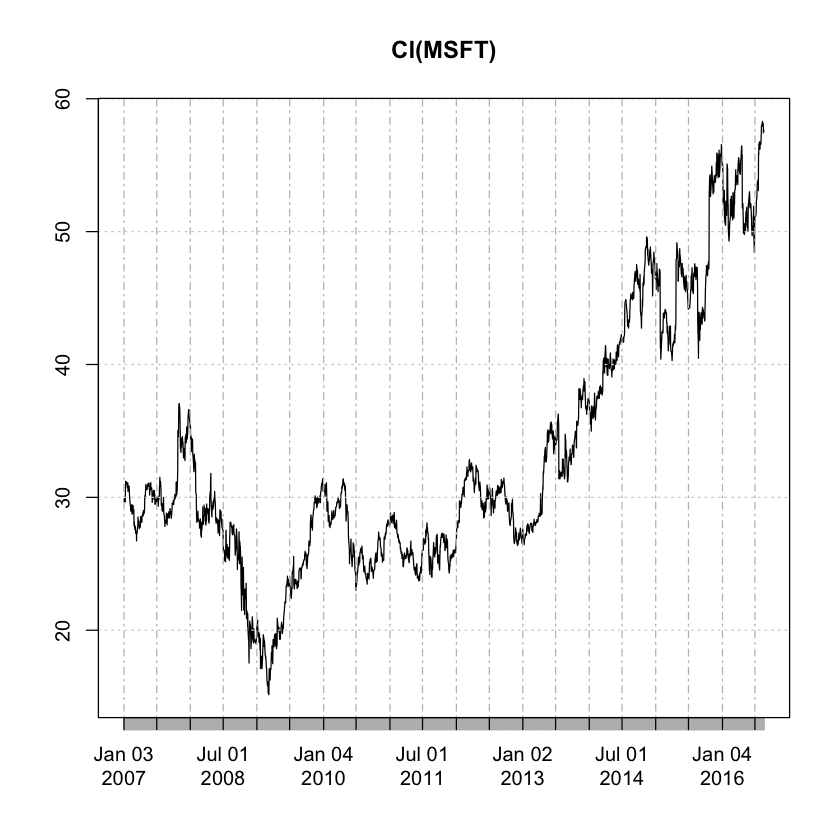

In [13]:
plot(Cl(MSFT))

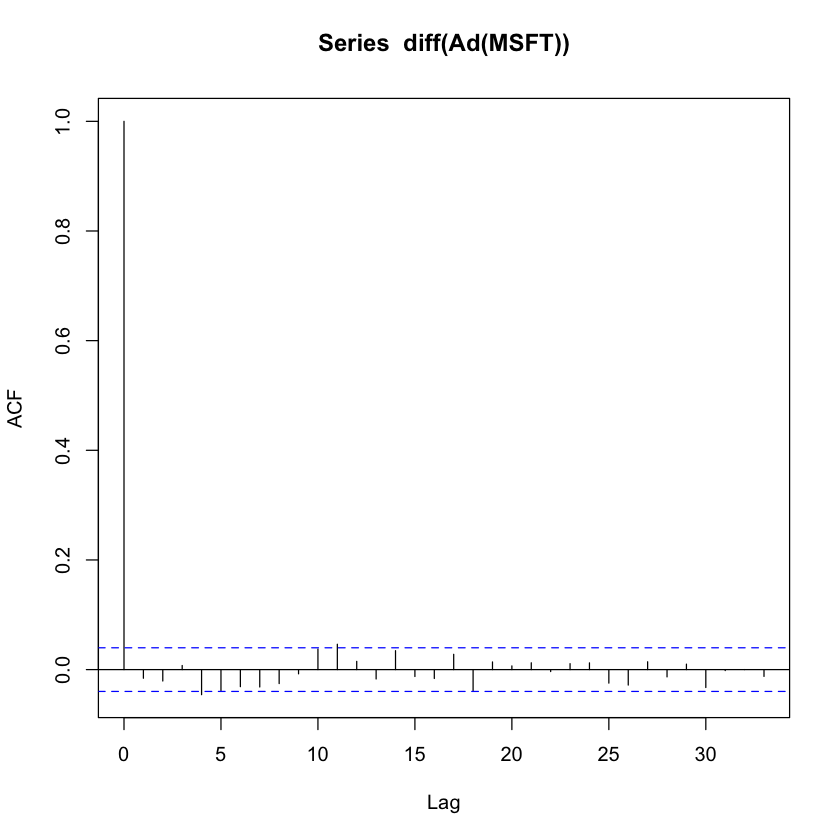

In [14]:
acf(diff(Ad(MSFT)), na.action=na.omit)

Hence we can conclude, with a reasonable degree of certainty, that the adjusted closing prices of MSFT are well approximated by a random walk. 

Let's now try the same approach on the S&P500 itself. The Yahoo Finance symbol for the S&P500 index is ^GSPC. 

[1] "GSPC"

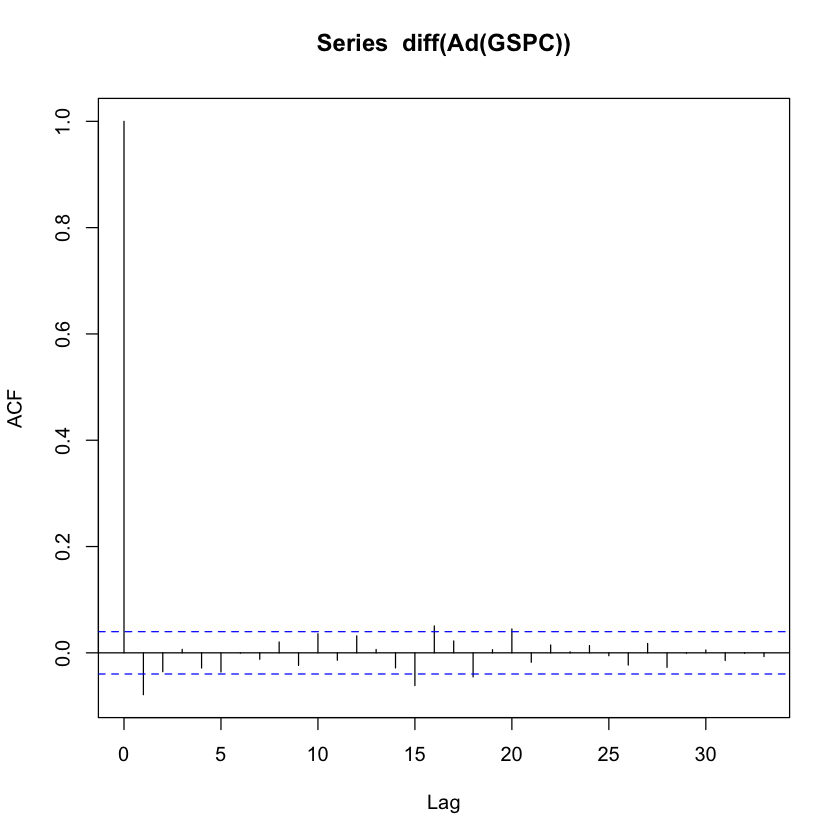

In [15]:
getSymbols('^GSPC', src='yahoo')
acf(diff(Ad(GSPC)), na.action=na.omit)

Notice that there is a negative correlation at k=1. This is unlikely to be due to random sampling variation. Notice also that there are peaks at k=15, 16, 18, 20. Although it is harder to justify their existence beyond that of random variation, they may be indicative of a longer-lag process. 

Hence it is much harder to justify that a random walk is a good model for the S&P500 Adjusted Close data. This motivates more sophisticated models, namely the **Autoregressive Models of Order p**!